In [1]:
import os
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import pickle
import numpy as np
import torch, gc
from ResTCN import ResTCN
from utils import get_dataloader

os.chdir(r"F:\RESTCN_CODE")

torch.manual_seed(0)
num_epochs = 25
batch_size = 6
lr = .001
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print("Device being used:", device, flush=True)


# dataloader = get_dataloader(batch_size,
#                             'train.csv',
#                             os.path.join(os.getcwd(), 'images_train'),
#                             'test.csv',
#                             os.path.join(os.getcwd(), 'images_test'))
dataloader = get_dataloader(batch_size,
                            'csv\\train.csv',
                            os.getcwd(),
                            'csv\\test.csv',
                            os.getcwd())

dataset_sizes = {x: len(dataloader[x].dataset) for x in ['train', 'test']}
print(dataset_sizes, flush=True) # OUTPUT: {'train': 5482, 'test': 1784}


model = ResTCN().to(device)
model_path = "resTCN_mod_model_weighted.pth"
model.load_state_dict(torch.load(model_path))
model.eval()  # Set model to evaluation mode

# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=50, gamma=.1)

criterion = nn.CrossEntropyLoss().to(device)
softmax = nn.Softmax()

import torch
import gc
import pickle
from tqdm import tqdm
import os

a = [] 
b = [] 

# Loop over phases
for phase in ['train']:
    for idx, (inputs, labels) in enumerate(tqdm(dataloader[phase], total=len(dataloader[phase]))):

        if idx == 914:
            break

        inputs = inputs.to(device)
        labels = labels.long().squeeze().to(device)

        with torch.no_grad():
            outputs = model(inputs).squeeze()

            for i, _, k in zip(labels, inputs, outputs):
                if phase == 'train':
                    a.append((i, k))
                else:
                    b.append((i, k))

 


c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device being used: cuda
{'train': 5482, 'test': 1723}


c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0

In [2]:
points = [[],[],[],[]]
for i in a:
    points[i[0].item()].append(i[1].cpu().numpy())
    

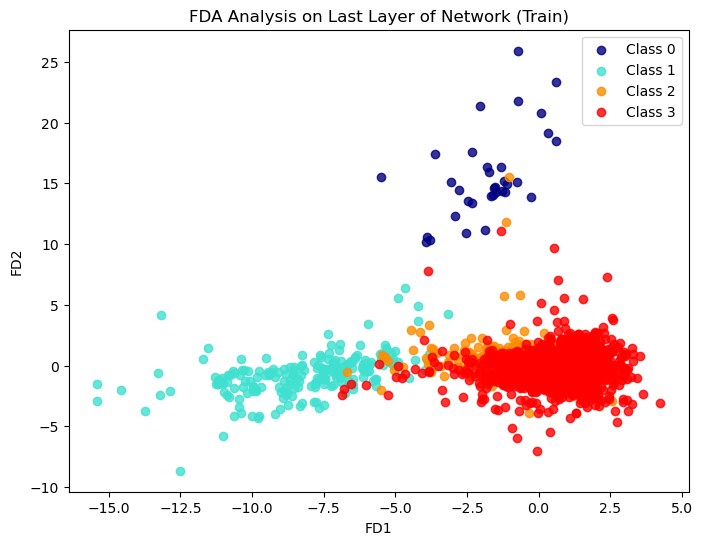

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data points in the format [[class0], [class1], [class2], [class3]]


# Concatenate the data for each class
X_concatenated = np.concatenate(points)

# Create labels for each data point based on the class it belongs to
y_concatenated = np.concatenate([np.full(len(class_data), class_label) 
                                 for class_label, class_data in enumerate(points)])

# Initialize and fit the Fisher's Discriminant Analysis model
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_concatenated, y_concatenated).transform(X_concatenated)

# Function to plot data on each pair of discriminant axes
def plot_lda(X_lda, y, num_classes):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'red']  # You can add more colors if needed
    lw = 2

    for color, i in zip(colors, range(num_classes)):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=f'Class {i}')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('FDA Analysis on Last Layer of Network (Train)')
    plt.xlabel('FD1')
    plt.ylabel('FD2')
    plt.show()

# Plot the data projected onto the two discriminant axes
plot_lda(X_lda, y_concatenated, len(points))


In [4]:
import os
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import pickle
import numpy as np
import torch, gc
from ResTCN import ResTCN
from utils import get_dataloader

os.chdir(r"F:\RESTCN_CODE")

torch.manual_seed(0)
num_epochs = 25
batch_size = 6
lr = .001
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print("Device being used:", device, flush=True)


# dataloader = get_dataloader(batch_size,
#                             'train.csv',
#                             os.path.join(os.getcwd(), 'images_train'),
#                             'test.csv',
#                             os.path.join(os.getcwd(), 'images_test'))
dataloader = get_dataloader(batch_size,
                            'csv\\train.csv',
                            os.getcwd(),
                            'csv\\test.csv',
                            os.getcwd())

dataset_sizes = {x: len(dataloader[x].dataset) for x in ['train', 'test']}
print(dataset_sizes, flush=True) # OUTPUT: {'train': 5482, 'test': 1784}


model = ResTCN().to(device)
model_path = "resTCN_mod_model_weighted.pth"
model.load_state_dict(torch.load(model_path))
model.eval()  # Set model to evaluation mode

# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=50, gamma=.1)

criterion = nn.CrossEntropyLoss().to(device)
softmax = nn.Softmax()

import torch
import gc
import pickle
from tqdm import tqdm
import os

a = [] 
b = [] 
try:
# Loop over phases
    for phase in ['test']:
        for idx, (inputs, labels) in enumerate(tqdm(dataloader[phase], total=len(dataloader[phase]))):

            if idx == 914:
                break

            # If idx is less than start_index, skip processing
            inputs = inputs.to(device)
            labels = labels.long().squeeze().to(device)

            with torch.no_grad():
                outputs = model(inputs).squeeze()

                for i, _, k in zip(labels, inputs, outputs):
                    if phase == 'train':
                        a.append((i, k))
                    else:
                        b.append((i, k))

    
except:
    pass

Device being used: cuda
{'train': 5482, 'test': 1723}


c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0

In [5]:
pointss = [[],[],[],[]]
for i in b:
    pointss[i[0].item()].append(i[1].cpu().numpy())
    

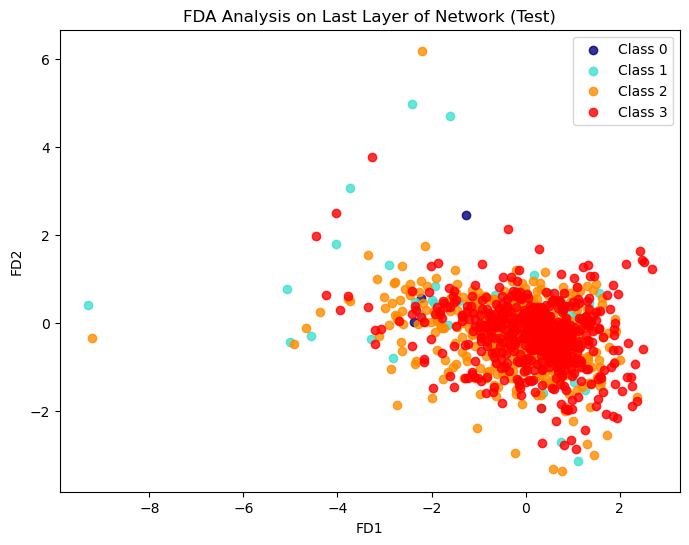

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data pointss in the format [[class0], [class1], [class2], [class3]]


# Concatenate the data for each class
X_concatenated = np.concatenate(pointss)

# Create labels for each data point based on the class it belongs to
y_concatenated = np.concatenate([np.full(len(class_data), class_label) 
                                 for class_label, class_data in enumerate(pointss)])

# Initialize and fit the Fisher's Discriminant Analysis model

X_lda = lda.transform(X_concatenated)

# Function to plot data on each pair of discriminant axes
def plot_lda(X_lda, y, num_classes):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'red']  # You can add more colors if needed
    lw = 2

    for color, i in zip(colors, range(num_classes)):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=f'Class {i}')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('FDA Analysis on Last Layer of Network (Test)')
    plt.xlabel('FD1')
    plt.ylabel('FD2')
    plt.show()


# Plot the data projected onto the two discriminant axes
plot_lda(X_lda, y_concatenated, len(pointss))


In [7]:
import os
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import pickle
import numpy as np
import torch, gc
from ResTCN import ResTCN
from utils import get_dataloader

os.chdir(r"F:\RESTCN_CODE")

torch.manual_seed(0)
num_epochs = 25
batch_size = 6
lr = .001
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print("Device being used:", device, flush=True)


# dataloader = get_dataloader(batch_size,
#                             'train.csv',
#                             os.path.join(os.getcwd(), 'images_train'),
#                             'test.csv',
#                             os.path.join(os.getcwd(), 'images_test'))
dataloader = get_dataloader(batch_size,
                            'csv\\train.csv',
                            os.getcwd(),
                            'csv\\test.csv',
                            os.getcwd())

dataset_sizes = {x: len(dataloader[x].dataset) for x in ['train', 'test']}
print(dataset_sizes, flush=True) # OUTPUT: {'train': 5482, 'test': 1784}


model = ResTCN().to(device)
model_path = "resTCN_mod_model_weighted-1.pth"
model.load_state_dict(torch.load(model_path))
model.eval()  # Set model to evaluation mode

# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=50, gamma=.1)

criterion = nn.CrossEntropyLoss().to(device)
softmax = nn.Softmax()

import torch
import gc
import pickle
from tqdm import tqdm
import os

a = [] 
b = [] 

# Loop over phases
for phase in ['train']:
    for idx, (inputs, labels) in enumerate(tqdm(dataloader[phase], total=len(dataloader[phase]))):

        if idx == 914:
            break

        # If idx is less than start_index, skip processing
        
        
        inputs = inputs.to(device)
        labels = labels.long().squeeze().to(device)

        with torch.no_grad():
            outputs = model(inputs).squeeze()

            for i, _, k in zip(labels, inputs, outputs):
                if phase == 'train':
                    a.append((i, k))
                else:
                    b.append((i, k))

 


Device being used: cuda
{'train': 5482, 'test': 1723}


c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0

In [8]:
tpoints = [[],[],[],[]]
for i in a:
    tpoints[i[0].item()].append(i[1].cpu().numpy())
    

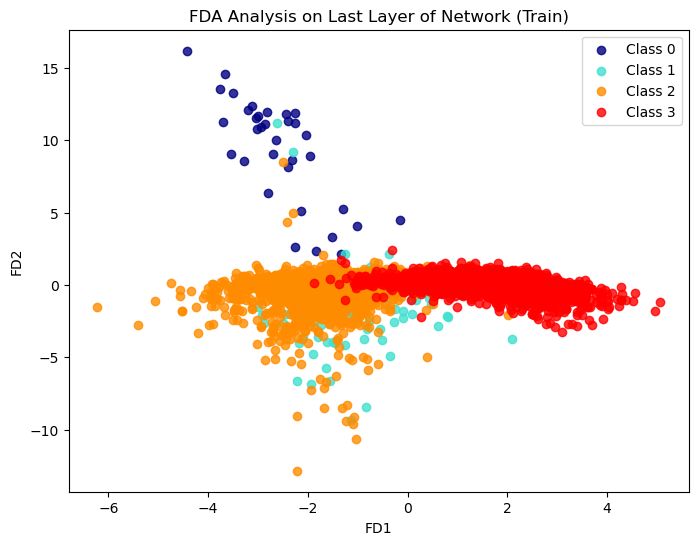

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data tpoints in the format [[class0], [class1], [class2], [class3]]


# Concatenate the data for each class
X_concatenated = np.concatenate(tpoints)

# Create labels for each data point based on the class it belongs to
y_concatenated = np.concatenate([np.full(len(class_data), class_label) 
                                 for class_label, class_data in enumerate(tpoints)])

# Initialize and fit the Fisher's Discriminant Analysis model
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_concatenated, y_concatenated).transform(X_concatenated)

# Function to plot data on each pair of discriminant axes
def plot_lda(X_lda, y, num_classes):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'red']  # You can add more colors if needed
    lw = 2

    for color, i in zip(colors, range(num_classes)):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=f'Class {i}')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('FDA Analysis on Last Layer of Network (Train)')
    plt.xlabel('FD1')
    plt.ylabel('FD2')
    plt.show()


# Plot the data projected onto the two discriminant axes
plot_lda(X_lda, y_concatenated, len(tpoints))


In [10]:
import os
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import pickle
import numpy as np
import torch, gc
from ResTCN import ResTCN
from utils import get_dataloader

os.chdir(r"F:\RESTCN_CODE")

torch.manual_seed(0)
num_epochs = 25
batch_size = 6
lr = .001
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print("Device being used:", device, flush=True)


# dataloader = get_dataloader(batch_size,
#                             'train.csv',
#                             os.path.join(os.getcwd(), 'images_train'),
#                             'test.csv',
#                             os.path.join(os.getcwd(), 'images_test'))
dataloader = get_dataloader(batch_size,
                            'csv\\train.csv',
                            os.getcwd(),
                            'csv\\test.csv',
                            os.getcwd())

dataset_sizes = {x: len(dataloader[x].dataset) for x in ['train', 'test']}
print(dataset_sizes, flush=True) # OUTPUT: {'train': 5482, 'test': 1784}


model = ResTCN().to(device)
model_path = "resTCN_mod_model_weighted-1.pth"
model.load_state_dict(torch.load(model_path))
model.eval()  # Set model to evaluation mode

# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=50, gamma=.1)

criterion = nn.CrossEntropyLoss().to(device)
softmax = nn.Softmax()

import torch
import gc
import pickle
from tqdm import tqdm
import os

a = [] 
b = [] 

try:
    # Loop over phases
    for phase in ['test']:
        for idx, (inputs, labels) in enumerate(tqdm(dataloader[phase], total=len(dataloader[phase]))):

            if idx == 914:
                break

            # If idx is less than start_index, skip processing
            inputs = inputs.to(device)
            labels = labels.long().squeeze().to(device)

            with torch.no_grad():
                outputs = model(inputs).squeeze()

                for i, _, k in zip(labels, inputs, outputs):
                    if phase == 'train':
                        a.append((i, k))
                    else:
                        b.append((i, k))

except:
    pass 


Device being used: cuda
{'train': 5482, 'test': 1723}


c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Manvendra Nema\anaconda3\envs\vercil\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0

In [11]:
pointss = [[],[],[],[]]
for i in b:
    pointss[i[0].item()].append(i[1].cpu().numpy())
    

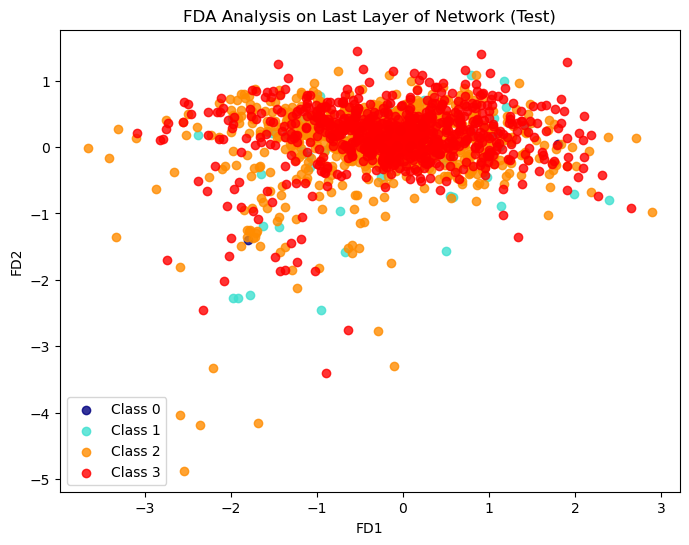

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data pointss in the format [[class0], [class1], [class2], [class3]]


# Concatenate the data for each class
X_concatenated = np.concatenate(pointss)

# Create labels for each data point based on the class it belongs to
y_concatenated = np.concatenate([np.full(len(class_data), class_label) 
                                 for class_label, class_data in enumerate(pointss)])

# Initialize and fit the Fisher's Discriminant Analysis model

X_lda = lda.transform(X_concatenated)

# Function to plot data on each pair of discriminant axes
def plot_lda(X_lda, y, num_classes):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'red']  # You can add more colors if needed
    lw = 2

    for color, i in zip(colors, range(num_classes)):
        plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                    label=f'Class {i}')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('FDA Analysis on Last Layer of Network (Test)')
    plt.xlabel('FD1')
    plt.ylabel('FD2')
    plt.show()


# Plot the data projected onto the two discriminant axes
plot_lda(X_lda, y_concatenated, len(pointss))
